# 개요 
* 인프콘 세션 듣고  간단히 정리 <br>
  * `혹시 당신은 데이터를 모르는 백엔드 개발자인가요` (김지호 님)
  
* [인프콘 다시보기 사이트](https://www.inflearn.com/course/%EC%9D%B8%ED%94%84%EC%BD%982024-%EB%8B%A4%EC%8B%9C%EB%B3%B4%EA%B8%B0/dashboard)

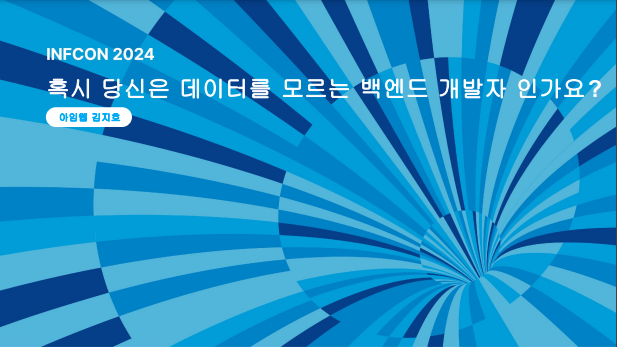

# 세션내용 정리

## 직무/팀에 따른 데이터에 대한 관점 차이

### 데이터에 대한 접근

* 백엔드 엔지니어 : CRUD(CREATE READ UPDATE DELETE)
* 데이터 팀 : AIRFLOW, DATA LAKE, OLAP, HADOOP 등


### 행 vs 열
* 백엔드 엔지니어 : 행을 잘 읽고 쓰는게 중요
  * 고객1이 어떤 물건을 얼마에 샀는지를 보는게 중요
* 데이터팀 : 열을 잘 보는게 중요
  * 비즈니스 인사이트를 위한 부분. 어떤 품목이 몇개나 팔렸나 등
* **열 기준의 데이터 관점**을 잘 알게되었을 때의 장점
  * **데이터 분석비용 감소, 확장성/생산성 증가**


### 데이터에 대한 관점차이로 발생하는 문제

* 예시) 분석비용의 증가
  * 엔지니어 : 행 데이터를 nested json, array 등으로 처리하는 것이 간편
  * 데이터 분석가 : 비즈니스 분석시 열 단위 분석한 아래와 같은 경우.
    * 아래와 같은 경우, row의 각 json 등을 모두 스캔해야하여 분석 비용이 많이 들 수 있음
      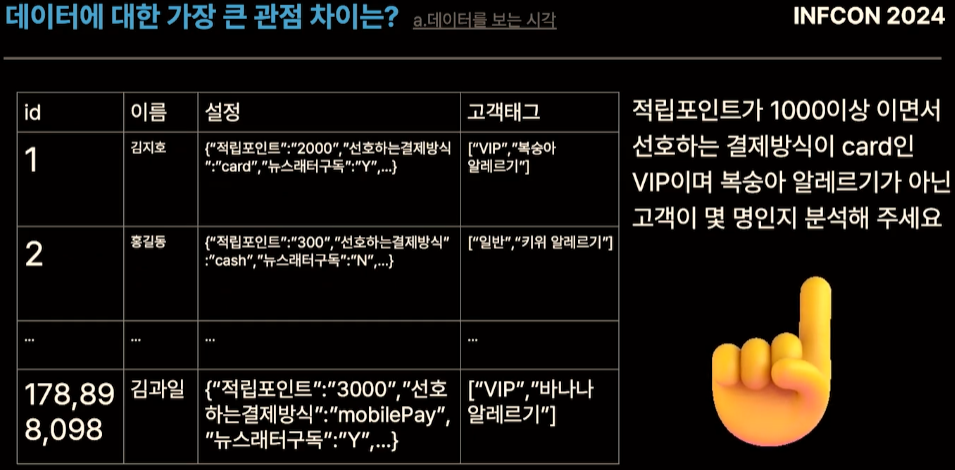
  * 정규화를 통한 해결, 앞으로 이 데이터가 분석에 쓰일 것인가를 고민
    * 안쓰일 것이라면 json으로도 문제가 되지 않겠지만, 그렇지 않다면 문제
    * 다만 대부분은 쓰일 것으로 예상됨

* 예시) 생산성의 감소
  * 엔지니어 : 결제방식 컬럼의 DB Comment(설명)이 없어 알 수 없는 상황 + 기존 결제방식(비즈니스)에 영향을 줄 수 있음
    * 이후 새로운 결제방식은 boolean인 컬럼으로 추가
    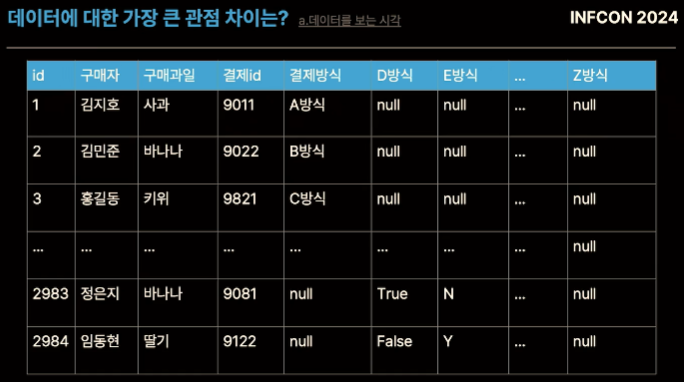
  * 데이터 분석가 : 분석을 하려고 하니, 결제방식컬럼과 함께, 다른 타입의 결제방식 컬럼들이 다수 존재하여 어려움
  * 데이터 카탈로그를 통해, 데이터에 대한 설명 등을 문서화하며 검색가능하도록 통합관리
    * '결제'와 같은 키워드 검색시, 테이블 이름/설명/컬럼명/문서 등을 출력
    * 데이터 카탈로그 등을 구축하지 못한다면, 적어도 Comment라도 남기기
      * 데이터가 어디에서 왔는지 등을 함께 명시


### 대용량 트래픽 vs 대용량 데이터
  * 엔지니어 : 대용량 트래픽을 고객에게 에러 발생없이 제공하는 것이 중요
  * 데이터 분석가 : 테이블 당 데이터의 수(row)가 많고 일반적인 RDBMS는 쿼리 등이 어려울 수 있음
    * 분산처리 등이 중요해짐
  * 단순히 DB에 쓰고 지우는 것이 데이터관리의 전부는 아님
    * Live Production DB에 무거운 분석쿼리를 날린다면, 고객의 쿼리 등이 중단/지연될 수 있음
      * 분석환경은 분리해서 운용

## 데이터의 무결성

* GIGO : 잘못된 데이터를 넣고 좋은 결과가 나올 수는 없음
* 데이터의 무결성을 지킨 데이터 필요
  * 유효성 : 정의된 범위에서 데이터 발생
    * 문제예시 - 유료서비스의 활성화 기간을 분석하고자 '만료일'을 확인하고자 함 
      * 비즈니스 로직 변경으로, Application에서만 저장되던 데이터를 엔지니어가 직접 일괄로 변경함
      * 프로모션 적용/컴플레인 대응/환불요청 등을 위해 고객센터 등에서 처리한 데이터 (로그가 남지 않음)
  * 정확성 : 실제 값을 정확하게 나타냄
    * 문제예시 - 유저 데이터의 물리삭제(회원탈퇴)
      * 탈퇴한 회원의 DELETE쿼리 실행
      * 회원의 탈퇴가 Human error인 경우
      * 유저의 활동을 통해 서비스 중인 현황을 분석하고자 할 때, 데이터가 없다면 분석 자체가 불가
    * 데이터의 저장비용(삭제)과 데이터의 가치(보존)에 대한 고민이 들 수 있음
      * 향후 어떻게 쓰일 지 알 수 없으므로 저장하는 것이 좋을 수 있음
  * 일관성 : 1개 컬럼은 1개의 값을 가져야 함
    * 문제예시 - 완료시점(Completed_at)을 하나의 컬럼으로 함께 사용하여, 후에 어떤 컬럼의 완료인지 알기 어려움
      * Completed_at을 함께사용하는 주문/배송 컬럼
        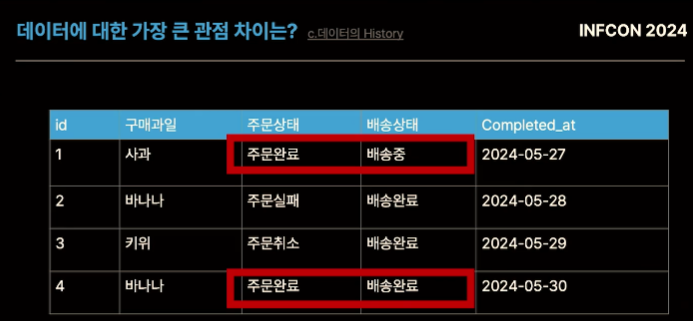